# Sesiunea 2: Curățarea Datelor - EU-SILC Estonia

## Obiectivul nostru

Vrem să analizăm **veniturile gospodăriilor din Estonia** pentru a înțelege inegalitatea economică.

**Dataset:** EU-SILC Estonia 2013 (~5,776 gospodării)

## Ipotezele noastre de cercetare

Înainte de a curăța datele, trebuie să știm **CE** vrem să analizăm:

1. **Distribuția veniturilor** - Cum sunt distribuite veniturile în Estonia?
2. **Factori care influențează venitul** - Există diferențe între urban și rural?
3. **Mărimea gospodăriei** - Afectează numărul de membri venitul total?

Aceste ipoteze ne ghidează în alegerea variabilelor!

---
## Partea 1: Încărcarea Datelor
---

### Ce sunt bibliotecile în Python?

O **bibliotecă** este o colecție de funcții gata făcute pe care le putem folosi.

- **pandas** - pentru lucrul cu tabele de date (DataFrames)
- **numpy** - pentru calcule matematice

Folosim `import` pentru a încărca o bibliotecă și `as` pentru a-i da un nume scurt.

In [118]:
# Încărcăm bibliotecile necesare
# pandas = biblioteca principală pentru analiza datelor
# numpy = biblioteca pentru calcule matematice (np.nan = valoare lipsă)

import pandas as pd  # "pd" este prescurtarea standard pentru pandas
import numpy as np   # "np" este prescurtarea standard pentru numpy

# Setare pentru a vedea mai multe coloane când afișăm un tabel
pd.set_option('display.max_columns', 30)

### Funcția `pd.read_csv()` - Citirea datelor

**Ce face:** Citește un fișier CSV și îl transformă într-un DataFrame (tabel).

**Sintaxa:**
```python
df = pd.read_csv('cale/către/fișier.csv')
```

**Parametri comuni:**
- `filepath` - calea către fișier
- `sep=','` - separatorul (implicit virgulă)
- `encoding='utf-8'` - codificarea caracterelor

In [119]:
# Citim fișierul CSV în variabila df_raw
# "../" înseamnă "un folder mai sus"
# df_raw = DataFrame brut (neschimbat)

df_raw = pd.read_csv('../datasets/EE_2013h_EUSILC.csv')

### Atributul `.shape` - Dimensiunile tabelului

**Ce face:** Returnează un tuplu (rânduri, coloane).

**Sintaxa:**
```python
df.shape      # returnează (număr_rânduri, număr_coloane)
df.shape[0]   # doar numărul de rânduri
df.shape[1]   # doar numărul de coloane
```

In [120]:
# Verificăm dimensiunile: câte rânduri și coloane avem?
# shape[0] = numărul de rânduri (gospodării)
# shape[1] = numărul de coloane (variabile)

print(f"Număr de rânduri: {df_raw.shape[0]}")
print(f"Număr de coloane: {df_raw.shape[1]}")

Număr de rânduri: 5775
Număr de coloane: 83


---
## Partea 2: Selectarea Variabilelor
---

### De ce selectăm doar anumite variabile?

Dataset-ul are **83 de coloane**, dar nu avem nevoie de toate. Motivele:

1. **Relevanță** - Alegem doar variabilele care răspund la ipotezele noastre
2. **Simplitate** - Un dataset mai mic este mai ușor de înțeles și procesat
3. **Calitate** - Unele variabile au prea multe valori lipsă

### Variabilele alese și motivația

| Cod EU-SILC | Nume nou | De ce am ales-o? |
|:------------|:---------|:-----------------|
| HB010 | an_sondaj | Pentru a ști anul datelor |
| HB020 | tara | Pentru a confirma că sunt date din Estonia |
| HB030 | id_gospodarie | Identificator unic pentru fiecare gospodărie |
| **HY010** | **venit_total** | **Variabila principală** - venitul total al gospodăriei |
| HY020 | venit_munca | Pentru a vedea cât din venit vine din muncă |
| HH030 | numar_membri | Pentru ipoteza 3 - mărimea gospodăriei |
| HX050 | marime_echivalenta | Mărime ajustată (un adult = 1, copil = 0.3) |
| HS040 | numar_camere | Indicator al condițiilor de trai |
| HH010 | grad_urbanizare | Pentru ipoteza 2 - urban vs rural |

### Dicționare în Python

Un **dicționar** este o structură de date care asociază **chei** cu **valori**.

```python
dictionar = {
    'cheie1': 'valoare1',
    'cheie2': 'valoare2'
}
```

Îl folosim pentru a mapa numele vechi ale coloanelor la numele noi.

In [121]:
# Creăm un dicționar: cod_vechi -> nume_nou
# Cheia (stânga) = numele original din EU-SILC
# Valoarea (dreapta) = numele nou, mai ușor de înțeles

variabile = {
    'HB010': 'an_sondaj',           # anul în care s-a făcut sondajul
    'HB020': 'tara',                # codul țării (EE = Estonia)
    'HB030': 'id_gospodarie',       # ID unic pentru fiecare gospodărie
    'HY010': 'venit_total',         # venitul total al gospodăriei (EUR/an)
    'HY020': 'venit_munca',         # venitul din muncă salariată (EUR/an)
    'HH030': 'numar_membri',        # câți membri are gospodăria
    'HX050': 'marime_echivalenta',  # mărime ajustată pentru comparații
    'HS040': 'numar_camere',        # câte camere are locuința
    'HH010': 'grad_urbanizare'      # 1=urban, 2=semi-urban, 3=rural
}

### Selectarea coloanelor dintr-un DataFrame

**Sintaxa:**
```python
# O singură coloană (returnează Series)
df['nume_coloana']

# Mai multe coloane (returnează DataFrame)
df[['coloana1', 'coloana2', 'coloana3']]

# Cu o listă de coloane
lista_coloane = ['col1', 'col2']
df[lista_coloane]
```

In [122]:
# list(variabile.keys()) = lista cheilor din dicționar
# adică: ['HB010', 'HB020', 'HB030', ...]

coloane_de_selectat = list(variabile.keys())
print("Coloanele pe care le selectăm:")
print(coloane_de_selectat)

Coloanele pe care le selectăm:
['HB010', 'HB020', 'HB030', 'HY010', 'HY020', 'HH030', 'HX050', 'HS040', 'HH010']


### Metoda `.copy()` - Crearea unei copii

**De ce folosim `.copy()`?**

În Python, când facem `df2 = df1`, NU creăm o copie nouă. Modificările în `df2` afectează și `df1`!

```python
# GREȘIT - df2 este doar o referință la df1
df2 = df1

# CORECT - df2 este o copie independentă
df2 = df1.copy()
```

In [123]:
# Selectăm doar coloanele dorite și facem o copie independentă
# .copy() = creează o copie nouă, separată de original

df = df_raw[coloane_de_selectat].copy()

### Metoda `.rename()` - Redenumirea coloanelor

**Ce face:** Schimbă numele coloanelor.

**Sintaxa:**
```python
df = df.rename(columns={'nume_vechi': 'nume_nou'})

# Sau cu un dicționar
mapping = {'vechi1': 'nou1', 'vechi2': 'nou2'}
df = df.rename(columns=mapping)
```

In [124]:
# Redenumim coloanele folosind dicționarul nostru
# columns=variabile spune că dicționarul e pentru coloane (nu rânduri)

df = df.rename(columns=variabile)

# Verificăm noile nume
print("Coloanele redenumite:")
print(list(df.columns))

Coloanele redenumite:
['an_sondaj', 'tara', 'id_gospodarie', 'venit_total', 'venit_munca', 'numar_membri', 'marime_echivalenta', 'numar_camere', 'grad_urbanizare']


In [125]:
# Verificăm câte coloane avem acum vs. înainte
print(f"Coloane înainte: {df_raw.shape[1]}")
print(f"Coloane după selectare: {df.shape[1]}")

Coloane înainte: 83
Coloane după selectare: 9


---
## Partea 3: Explorarea Datelor
---

### Metoda `.head()` - Primele rânduri

**Ce face:** Afișează primele N rânduri din tabel (implicit 5).

**Sintaxa:**
```python
df.head()     # primele 5 rânduri
df.head(10)   # primele 10 rânduri
df.head(3)    # primele 3 rânduri
```

**De ce o folosim:** Pentru a vedea rapid cum arată datele noastre.

In [126]:
# Afișăm primele 5 rânduri pentru a vedea cum arată datele
df.head()

,an_sondaj,tara,id_gospodarie,venit_total,venit_munca,numar_membri,marime_echivalenta,numar_camere,grad_urbanizare
0,2013,EE,7,0,-32,5.0,1.0,2,4.0
1,2013,EE,24,3324,3320,6.0,1.0,2,1.0
2,2013,EE,49,7805,7488,3.0,1.0,1,1.0
3,2013,EE,52,16688,15222,6.0,1.0,1,4.0
4,2013,EE,79,74,57,2.0,1.0,2,1.0


### Metoda `.describe()` - Statistici descriptive

**Ce face:** Calculează statistici pentru fiecare coloană numerică.

**Ce returnează:**

| Statistică | Ce înseamnă | Exemplu |
|:-----------|:------------|:--------|
| **count** | Câte valori non-null avem | 5775 |
| **mean** | Media aritmetică | 14621.99 |
| **std** | Deviația standard (cât de împrăștiate sunt valorile) | 13363.05 |
| **min** | Valoarea minimă | -37048 |
| **25%** | Percentila 25 (un sfert din valori sunt sub aceasta) | 5142 |
| **50%** | Mediana (jumătate sunt sub, jumătate peste) | 10500 |
| **75%** | Percentila 75 (trei sferturi din valori sunt sub aceasta) | 19913 |
| **max** | Valoarea maximă | 131049 |

In [127]:
# Calculăm statistici descriptive pentru toate coloanele numerice
# Observați valorile min negative pentru venit_total și venit_munca!

df.describe()

,an_sondaj,id_gospodarie,venit_total,venit_munca,numar_membri,marime_echivalenta,numar_camere,grad_urbanizare
count,5775.0,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5741.000000
mean,2013.0,58473.348745,14621.991342,12377.040000,3.837403,1.550771,1.247792,2.868490
std,0.0,34041.152808,13363.055834,12939.692846,1.284707,0.549436,0.431768,1.346806
min,2013.0,7.000000,-37048.000000,-47457.000000,1.000000,1.000000,1.000000,1.000000
25%,2013.0,28658.500000,5142.000000,3915.000000,3.000000,1.000000,1.000000,1.000000
50%,2013.0,58468.000000,10500.000000,8274.000000,4.000000,1.500000,1.000000,4.000000
75%,2013.0,87720.000000,19913.500000,17252.000000,5.000000,2.000000,1.000000,4.000000
max,2013.0,118004.000000,131049.000000,130144.000000,6.000000,4.600000,2.000000,4.000000


### Ce observăm în statistici?

Uitați-vă la rândul **min** pentru `venit_total` și `venit_munca`:

- `venit_total`: min = **-37,048** EUR
- `venit_munca`: min = **-47,457** EUR

**Întrebare importantă:** Pot fi veniturile negative?

**Răspuns:** DA și NU! Depinde de ce reprezintă acele valori.

---
## Partea 4: Înțelegerea Valorilor Negative
---

### Tipuri de valori negative în date economice

Când vedem valori negative în date economice, pot fi **3 situații**:

| Tip | Exemplu | Este valid? | Ce facem? |
|:----|:--------|:------------|:----------|
| **Cod missing** | -1, -2, -5 | NU | Convertim în NaN |
| **Pierdere reală** | -47,457 | DA | Păstrăm |
| **Eroare de date** | -999999 | NU | Investigăm |

### Codurile standard EU-SILC pentru valori lipsă

În EU-SILC, valorile lipsă NU sunt marcate cu NaN, ci cu **coduri numerice negative**:

| Cod | Semnificație în engleză | Ce înseamnă |
|:----|:------------------------|:------------|
| **-1** | Not applicable | Nu se aplică acestei gospodării |
| **-2** | Not collected | Nu a fost colectată informația |
| **-4** | Not applicable + not collected | Combinație |
| **-5** | Missing | Valoare lipsă (nu se știe) |

**Important:** Aceste coduri trebuie convertite în NaN pentru analiză corectă!

### Să investigăm valorile negative din datele noastre

### Comparații în pandas

Când facem o comparație pe o coloană, obținem o **Serie de True/False**:

```python
df['coloana'] < 0   # returnează True unde valoarea e negativă
```

Apoi putem număra câte True avem cu `.sum()` (True=1, False=0).

In [128]:
# Numărăm valorile negative pentru fiecare coloană de venit
# (df[col] < 0) = Serie de True/False
# .sum() = numără câte True sunt

for col in ['venit_total', 'venit_munca']:
    numar_negative = (df[col] < 0).sum()
    print(f"{col}: {numar_negative} valori negative")

venit_total: 5 valori negative
venit_munca: 298 valori negative


### Filtrarea datelor în pandas

Putem selecta doar rândurile care îndeplinesc o condiție:

```python
# Toate rândurile unde venit_munca este negativ
df[df['venit_munca'] < 0]

# Doar coloana venit_munca pentru acele rânduri
df[df['venit_munca'] < 0]['venit_munca']
```

In [129]:
# Selectăm doar valorile negative din venit_munca
# Pas 1: df['venit_munca'] < 0 = care rânduri sunt negative?
# Pas 2: df[...] = selectează acele rânduri
# Pas 3: ['venit_munca'] = ia doar coloana venit_munca

valori_negative = df[df['venit_munca'] < 0]['venit_munca']

print(f"Am găsit {len(valori_negative)} valori negative")

Am găsit 298 valori negative


In [130]:
# Vedem statisticile pentru valorile negative
print("Statistici pentru valorile negative:")
print(valori_negative.describe())

Statistici pentru valorile negative:
count      298.000000
mean     -2982.110738
std       5318.042397
min     -47457.000000
25%      -3508.750000
50%      -1457.500000
75%       -183.250000
max         -1.000000
Name: venit_munca, dtype: float64


---
## Partea 5: Vizualizarea Datelor cu Pandas
---

### Metoda `.plot()` - Grafice în pandas

Pandas poate crea grafice direct din date! Folosim metoda `.plot()`.

**Sintaxa de bază:**
```python
df['coloana'].plot(kind='tip_grafic')
```

**Tipuri de grafice (kind):**

| kind | Tip grafic | Când îl folosim |
|:-----|:-----------|:----------------|
| `'hist'` | Histogramă | Distribuția unei variabile |
| `'box'` | Boxplot | Detectarea outliers |
| `'bar'` | Bare verticale | Comparații între categorii |
| `'line'` | Linie | Evoluție în timp |
| `'scatter'` | Puncte | Relația între 2 variabile |

### Histograma - Ce este și cum o interpretăm?

**Ce este o histogramă?**
- Împarte valorile în **intervale** (bins)
- Arată **câte valori** cad în fiecare interval
- Axa X = valorile
- Axa Y = frecvența (de câte ori apare)

**Cum o interpretăm?**
- **Vârf înalt** = multe valori în acel interval
- **Coadă lungă** = valori extreme (outliers)
- **Forma** ne spune despre distribuție (normală, asimetrică, etc.)

<Axes: title={'center': 'Histogramă: Distribuția venitului din muncă'}, ylabel='Frequency'>

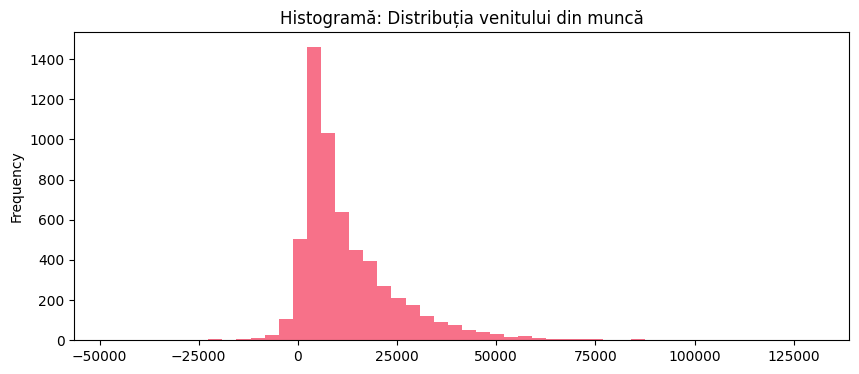

In [131]:
# Creăm o histogramă pentru venit_munca
# kind='hist' = tip histogramă
# bins=50 = împarte în 50 de intervale
# figsize=(10, 4) = dimensiunea graficului (lățime, înălțime)
# title = titlul graficului

df['venit_munca'].plot(
    kind='hist',
    bins=50,
    figsize=(10, 4),
    title='Histogramă: Distribuția venitului din muncă'
)

# Observați coada din stânga - valorile negative!

### Boxplot - Ce este și cum îl interpretăm?

**Ce este un boxplot?**

Un grafic care arată distribuția datelor prin 5 valori cheie:

```
         ┌─────────────────────────────────────┐
    ○    │    ┌───────┬───────┐               │    ○
outliers │    │       │       │               │ outliers
         │────┤  BOX  │       ├───────────────│
         │    │       │       │               │
         │    └───────┴───────┘               │
         └─────────────────────────────────────┘
         min  Q1     median  Q3              max
```

**Componentele:**

| Componentă | Ce reprezintă |
|:-----------|:--------------|
| **Cutia (box)** | 50% din date (între Q1 și Q3) |
| **Linia din mijloc** | Mediana (50% sunt sub, 50% peste) |
| **Mustățile (whiskers)** | Extinderea datelor (fără outliers) |
| **Punctele (○)** | Outliers - valori extreme |

### Cum identificăm outliers în boxplot?

**Outliers** = valori care sunt foarte diferite de restul datelor.

**Formula:**
- IQR = Q3 - Q1 (distanța inter-quartilă)
- Outlier jos: < Q1 - 1.5 × IQR
- Outlier sus: > Q3 + 1.5 × IQR

**În boxplot:** Punctele din afara mustăților sunt outliers!

<Axes: title={'center': 'Boxplot: Venit din muncă (observați outliers-ii negativi!)'}>

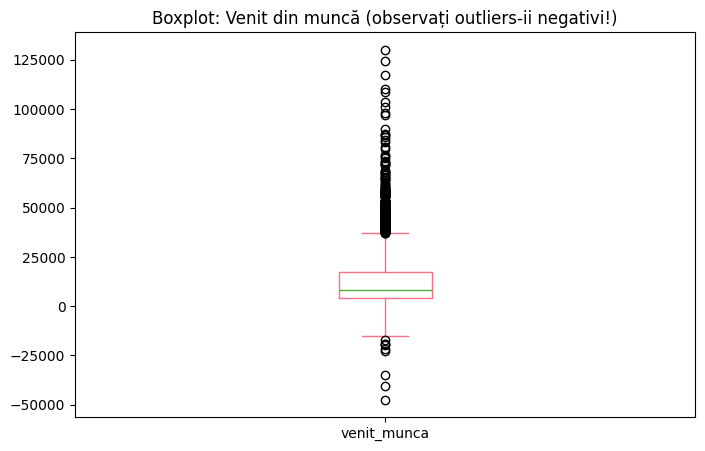

In [132]:
# Creăm un boxplot pentru venit_munca
# kind='box' = tip boxplot
# Punctele de jos sunt outliers (inclusiv valorile negative!)

df['venit_munca'].plot(
    kind='box',
    figsize=(8, 5),
    title='Boxplot: Venit din muncă (observați outliers-ii negativi!)'
)

### Interpretarea boxplot-ului de mai sus

Ce vedem în grafic:

1. **Cutia** - majoritatea veniturilor sunt între ~4,000 și ~17,000 EUR
2. **Mediana** - venitul tipic este ~8,000 EUR
3. **Outliers jos** - valori foarte negative (pierderi sau coduri missing)
4. **Outliers sus** - gospodării cu venituri foarte mari

**Concluzie:** Trebuie să investigăm valorile negative!

### Să separăm codurile missing de valorile reale

### Condiții multiple în pandas

Putem combina mai multe condiții:

```python
# ȘI logic (ambele trebuie să fie adevărate)
(condiție1) & (condiție2)

# SAU logic (cel puțin una adevărată)
(condiție1) | (condiție2)
```

**Important:** Folosiți paranteze în jurul fiecărei condiții!

In [133]:
# Separăm valorile negative în două categorii:
# 1. Coduri missing: între -5 și -1 (inclusiv)
# 2. Valori negative reale: mai mici de -5

# Coduri missing (între -5 și 0, exclusiv 0)
conditie_coduri = (df['venit_munca'] >= -5) & (df['venit_munca'] < 0)
coduri_missing = df[conditie_coduri]['venit_munca']

# Valori negative reale (mai mici de -5)
conditie_reale = df['venit_munca'] < -5
valori_negative_reale = df[conditie_reale]['venit_munca']

print(f"Coduri missing (-5 până la -1): {len(coduri_missing)}")
print(f"Valori negative reale (< -5): {len(valori_negative_reale)}")

Coduri missing (-5 până la -1): 16
Valori negative reale (< -5): 282


### Metoda `.value_counts()` - Numărarea valorilor

**Ce face:** Numără de câte ori apare fiecare valoare unică.

**Sintaxa:**
```python
df['coloana'].value_counts()              # ordonate descrescător după frecvență
df['coloana'].value_counts().sort_index() # ordonate după valoare
```

In [134]:
# Vedem ce coduri missing avem
# .sort_index() = sortează după valoare (nu după frecvență)

print("Codurile missing găsite:")
print(coduri_missing.value_counts().sort_index())

Codurile missing găsite:
venit_munca
-5    2
-4    3
-3    5
-2    4
-1    2
Name: count, dtype: int64


### Concluzia investigației

Am descoperit că:

1. **Codurile -1, -2, -4, -5** = valori lipsă (trebuie convertite în NaN)
2. **Valorile mai mici de -5** = pierderi reale din afaceri (le păstrăm)

---
## Partea 6: Strategia de Curățare
---

### Deciziile noastre pentru valorile negative

| Situație | Decizie | Motivație |
|:---------|:--------|:----------|
| Coduri -1, -2, -4, -5 | Convertim în NaN | Sunt coduri standard EU-SILC pentru "lipsă" |
| Valori < -5 (ex: -47457) | **Păstrăm** | Sunt pierderi reale din afaceri/investiții |

### De ce păstrăm valorile negative mari?

1. **Economic valid** - O gospodărie poate avea pierderi din afaceri
2. **Important pentru analiză** - Excluderea lor ar denatura distribuția
3. **Reprezintă realitatea** - Unele gospodării chiar au "venituri negative"

### Strategia pentru valori lipsă (NaN)

După conversia codurilor în NaN, trebuie să decidem ce facem cu ele:

| Variabilă | Strategie | Motivație |
|:----------|:----------|:----------|
| venit_total | Ștergem rândul dacă lipsește | Este variabila principală |
| venit_munca | Înlocuim cu 0 | Poate nu au avut venit din muncă |
| grad_urbanizare | Înlocuim cu moda | Este categorială |

---
## Partea 7: Aplicarea Curățării
---

In [135]:
# Facem o copie pentru curățare
# Nu modificăm df original, astfel putem compara înainte/după

df_clean = df.copy()

print(f"Începem cu: {len(df_clean)} gospodării")

Începem cu: 5775 gospodării


### Metoda `.replace()` - Înlocuirea valorilor

**Ce face:** Înlocuiește anumite valori cu altele.

**Sintaxa:**
```python
# Înlocuiește o valoare
df['col'] = df['col'].replace(valoare_veche, valoare_nouă)

# Înlocuiește mai multe valori cu aceeași valoare nouă
df['col'] = df['col'].replace([val1, val2, val3], valoare_nouă)

# np.nan = valoare lipsă în numpy/pandas
df['col'] = df['col'].replace([-1, -2], np.nan)
```

In [136]:
# Definim codurile EU-SILC pentru valori lipsă
coduri_lipsa = [-1, -2, -4, -5]

# Înlocuim în toate coloanele numerice
# select_dtypes(include=['number']) = selectează doar coloanele cu numere

for coloana in df_clean.select_dtypes(include=['number']).columns:
    # Numărăm câte coduri găsim înainte
    numar_coduri = df_clean[coloana].isin(coduri_lipsa).sum()
    
    # Înlocuim codurile cu NaN
    df_clean[coloana] = df_clean[coloana].replace(coduri_lipsa, np.nan)
    
    # Afișăm doar dacă am găsit coduri
    if numar_coduri > 0:
        print(f"{coloana}: {numar_coduri} coduri convertite în NaN")

venit_munca: 11 coduri convertite în NaN


### Metoda `.isnull()` - Detectarea valorilor lipsă

**Ce face:** Returnează True pentru fiecare celulă care este NaN.

**Sintaxa:**
```python
df.isnull()         # DataFrame de True/False
df.isnull().sum()   # Numără NaN-urile per coloană
df['col'].isnull()  # Serie de True/False pentru o coloană
```

In [137]:
# Verificăm câte valori lipsă avem acum
# .isnull() = True unde e NaN
# .sum() = numără True-urile

valori_lipsa = df_clean.isnull().sum()

# Afișăm doar coloanele care au valori lipsă
print("Valori lipsă per coloană:")
print(valori_lipsa[valori_lipsa > 0])

Valori lipsă per coloană:
venit_munca        11
grad_urbanizare    34
dtype: int64


### Vizualizăm valorile lipsă

<Axes: title={'center': 'Procent valori lipsă per coloană'}>

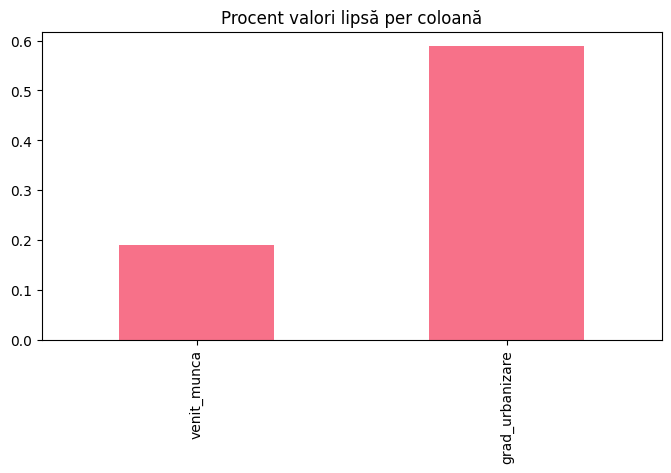

In [138]:
# Calculăm procentul de valori lipsă
procent_lipsa = (df_clean.isnull().sum() / len(df_clean)) * 100

# Grafic doar pentru coloanele cu valori lipsă
procent_lipsa[procent_lipsa > 0].plot(
    kind='bar',
    title='Procent valori lipsă per coloană',
    figsize=(8, 4)
)

### Metoda `.fillna()` - Completarea valorilor lipsă

**Ce face:** Înlocuiește NaN cu o valoare specificată.

**Sintaxa:**
```python
# Cu o valoare fixă
df['col'] = df['col'].fillna(0)
df['col'] = df['col'].fillna('necunoscut')

# Cu media coloanei
df['col'] = df['col'].fillna(df['col'].mean())

# Cu mediana coloanei
df['col'] = df['col'].fillna(df['col'].median())

# Cu moda (cea mai frecventă valoare)
df['col'] = df['col'].fillna(df['col'].mode()[0])
```

In [139]:
# Tratăm venit_munca: înlocuim NaN cu 0
# Motivație: dacă e lipsă, probabil nu au avut venit din muncă

df_clean['venit_munca'] = df_clean['venit_munca'].fillna(0)

print("venit_munca: valorile lipsă au fost înlocuite cu 0")

venit_munca: valorile lipsă au fost înlocuite cu 0


### Metoda `.mode()` - Calcularea modei

**Ce face:** Returnează valoarea cea mai frecventă.

**Sintaxa:**
```python
df['col'].mode()      # Returnează o Serie (pot fi mai multe mode)
df['col'].mode()[0]   # Prima modă (cea mai frecventă valoare)
```

**Când o folosim:** Pentru variabile categoriale (ex: urban/rural).

In [140]:
# Tratăm grad_urbanizare: înlocuim NaN cu moda
# Motivație: e variabilă categorială, moda e cea mai reprezentativă

# Calculăm moda (cea mai frecventă valoare)
moda_urbanizare = df_clean['grad_urbanizare'].mode()[0]
print(f"Moda pentru grad_urbanizare: {moda_urbanizare}")

# Înlocuim NaN cu moda
df_clean['grad_urbanizare'] = df_clean['grad_urbanizare'].fillna(moda_urbanizare)

print(f"grad_urbanizare: valorile lipsă au fost înlocuite cu {moda_urbanizare}")

Moda pentru grad_urbanizare: 4.0
grad_urbanizare: valorile lipsă au fost înlocuite cu 4.0


### Verificare: mai avem valori lipsă?

In [141]:
# Verificăm final
print("Valori lipsă rămase:")
print(df_clean.isnull().sum())

Valori lipsă rămase:
an_sondaj             0
tara                  0
id_gospodarie         0
venit_total           0
venit_munca           0
numar_membri          0
marime_echivalenta    0
numar_camere          0
grad_urbanizare       0
dtype: int64


---
## Partea 8: Verificare Finală
---

### Verificăm valorile negative rămase

In [142]:
# După curățare, valorile negative rămase sunt REALE (pierderi)
# Nu sunt coduri missing!

for col in ['venit_total', 'venit_munca']:
    negative = (df_clean[col] < 0).sum()
    if negative > 0:
        print(f"{col}: {negative} valori negative (pierderi reale din afaceri)")

venit_total: 5 valori negative (pierderi reale din afaceri)
venit_munca: 287 valori negative (pierderi reale din afaceri)


Descriii

<Axes: title={'center': 'Boxplot venituri (după curățare)'}>

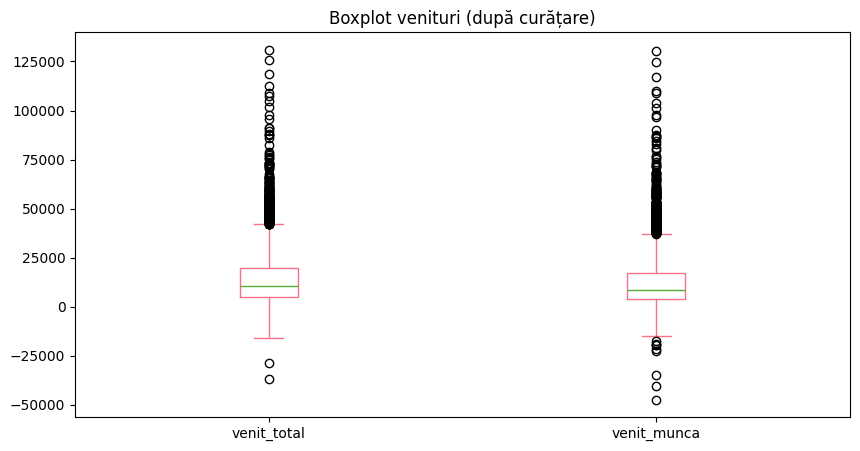

In [143]:
# Boxplot final - vedem distribuția după curățare
df_clean[['venit_total', 'venit_munca']].plot(
    kind='box',
    figsize=(10, 5),
    title='Boxplot venituri (după curățare)'
)

### Interpretare

Valorile negative rămase sunt **pierderi reale** din afaceri. Le păstrăm pentru că:
- Sunt economic valide
- Reprezintă realitatea gospodăriilor
- Sunt importante pentru analiza inegalității

### Statistici finale

In [144]:
# Statistici pentru dataset-ul curat
df_clean.describe()

,an_sondaj,id_gospodarie,venit_total,venit_munca,numar_membri,marime_echivalenta,numar_camere,grad_urbanizare
count,5775.0,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000
mean,2013.0,58473.348745,14621.991342,12377.045541,3.837403,1.550771,1.247792,2.875152
std,0.0,34041.152808,13363.055834,12939.687544,1.284707,0.549436,0.431768,1.345623
min,2013.0,7.000000,-37048.000000,-47457.000000,1.000000,1.000000,1.000000,1.000000
25%,2013.0,28658.500000,5142.000000,3915.000000,3.000000,1.000000,1.000000,1.000000
50%,2013.0,58468.000000,10500.000000,8274.000000,4.000000,1.500000,1.000000,4.000000
75%,2013.0,87720.000000,19913.500000,17252.000000,5.000000,2.000000,1.000000,4.000000
max,2013.0,118004.000000,131049.000000,130144.000000,6.000000,4.600000,2.000000,4.000000


### Metoda `.hist()` pentru DataFrame

Putem crea histograme pentru TOATE coloanele numerice simultan:

```python
df.hist(figsize=(12, 8), bins=30)
```

array([[<Axes: title={'center': 'an_sondaj'}>,
        <Axes: title={'center': 'id_gospodarie'}>,
        <Axes: title={'center': 'venit_total'}>],
       [<Axes: title={'center': 'venit_munca'}>,
        <Axes: title={'center': 'numar_membri'}>,
        <Axes: title={'center': 'marime_echivalenta'}>],
       [<Axes: title={'center': 'numar_camere'}>,
        <Axes: title={'center': 'grad_urbanizare'}>, <Axes: >]],
      dtype=object)

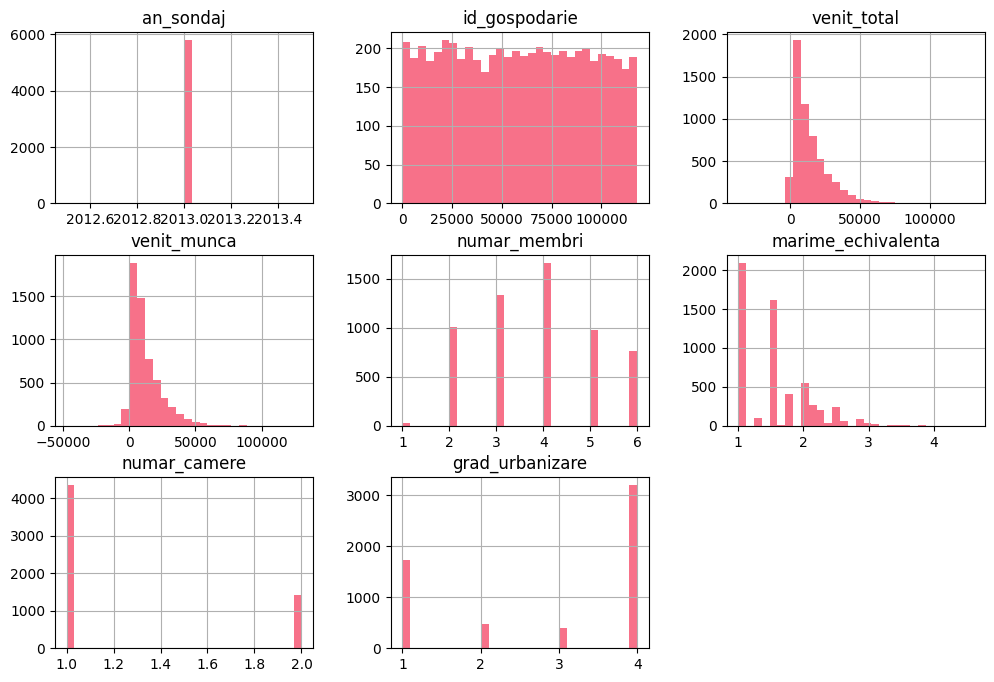

In [145]:
# Histograme pentru toate variabilele numerice
df_clean.hist(figsize=(12, 8), bins=30)

---
## Partea 9: Salvarea Datelor
---

In [146]:
# Raport final de curățare
print("RAPORT CURĂȚARE")
print("-" * 40)
print(f"Rânduri (gospodării): {len(df_clean)}")
print(f"Coloane (variabile): {len(df_clean.columns)}")
print(f"Valori lipsă totale: {df_clean.isnull().sum().sum()}")

RAPORT CURĂȚARE
----------------------------------------
Rânduri (gospodării): 5775
Coloane (variabile): 9
Valori lipsă totale: 0


### Metoda `.to_csv()` - Salvarea în CSV

**Ce face:** Salvează DataFrame-ul într-un fișier CSV.

**Sintaxa:**
```python
df.to_csv('cale/către/fișier.csv', index=False)
```

**Parametri:**
- `index=False` - nu salvăm indexul (numerele rândurilor)

In [147]:
# Salvăm dataset-ul curat
# index=False = nu includem indexul (numerele de rând)

df_clean.to_csv('../datasets/eusilc_clean.csv', index=False)

print("Dataset salvat: eusilc_clean.csv")

Dataset salvat: eusilc_clean.csv


---
## Recapitulare
---

### Pașii curățării datelor

1. **Definește ipotezele** - Ce vrei să analizezi?
2. **Selectează variabilele** - Alege doar ce e relevant
3. **Explorează datele** - `.describe()`, `.head()`
4. **Identifică problemele** - Valori lipsă, coduri, outliers
5. **Decide strategia** - Documentează motivația!
6. **Aplică curățarea** - `.replace()`, `.fillna()`
7. **Verifică rezultatul** - Vizualizări, statistici
8. **Salvează** - `.to_csv()`

### Funcțiile pandas învățate

| Funcție | Ce face | Exemplu |
|:--------|:--------|:--------|
| `pd.read_csv()` | Citește fișier CSV | `pd.read_csv('date.csv')` |
| `.shape` | Dimensiuni (rânduri, coloane) | `df.shape` |
| `.head()` | Primele N rânduri | `df.head(5)` |
| `.describe()` | Statistici descriptive | `df.describe()` |
| `.copy()` | Creează o copie | `df2 = df.copy()` |
| `.rename()` | Redenumește coloane | `df.rename(columns={...})` |
| `.isnull()` | Detectează NaN | `df.isnull().sum()` |
| `.replace()` | Înlocuiește valori | `df.replace(-1, np.nan)` |
| `.fillna()` | Completează NaN | `df.fillna(0)` |
| `.mode()` | Calculează moda | `df['col'].mode()[0]` |
| `.value_counts()` | Numără valori | `df['col'].value_counts()` |
| `.plot()` | Creează grafice | `df.plot(kind='hist')` |
| `.to_csv()` | Salvează în CSV | `df.to_csv('out.csv')` |

### Tipuri de grafice (kind în .plot())

| kind | Nume | Când îl folosim |
|:-----|:-----|:----------------|
| `'hist'` | Histogramă | Distribuția unei variabile |
| `'box'` | Boxplot | Detectarea outliers |
| `'bar'` | Bare verticale | Comparații între categorii |
| `'line'` | Linie | Evoluție în timp |
| `'scatter'` | Puncte | Relația între 2 variabile |